In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

df = pd.read_csv('banking.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [3]:
y = df.y
X = df[[colu for colu in df.columns if df[colu].dtype in ['int64', 'float64']]]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

log_regression = LogisticRegression()
log_regression.fit(X_train, y_train)
LogisticRegression()

C:\python310\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:
y_pred = log_regression.predict(X_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[10867,   114],
       [  526,   850]], dtype=int64)

<AxesSubplot: >

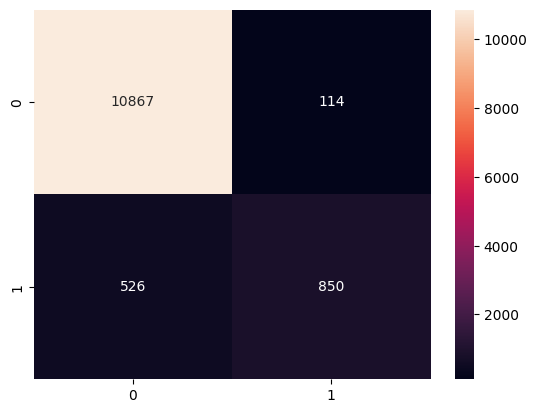

In [47]:
ax = plt.subplot()
sns.heatmap(cnf_matrix, annot=True, fmt='g', ax=ax)

In [6]:
print('Accurancy:', metrics.accuracy_score(y_test, y_pred))

Accurancy: 0.9482074937282512


In [7]:
print('Точність:', metrics.precision_score(y_test, y_pred))

Точність: 0.8817427385892116


In [8]:
print('Повнота:', metrics.recall_score(y_test, y_pred))

Повнота: 0.6177325581395349


In [9]:
print('Повнота:', metrics.f1_score(y_test, y_pred, average=None))

Повнота: [0.97139537 0.72649573]


In [10]:
y_pred_proba = log_regression.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

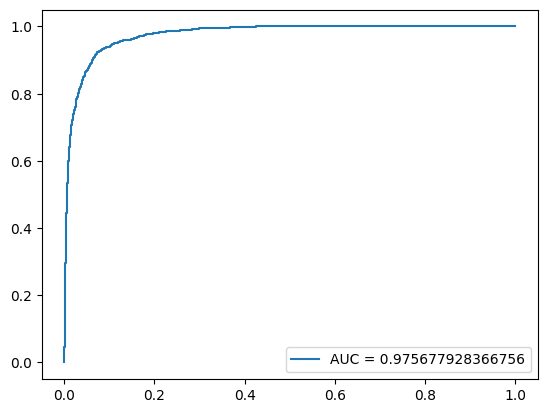

In [11]:
plt.plot(fpr,tpr, label="AUC = "+str(auc))
plt.legend(loc=4)
plt.show()

In [ ]:
metrics